
<h2 id="Wprowadzenie">Wprowadzenie<a class="anchor-link" href="#Wprowadzenie">¶</a></h2><p>Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.</p>


In [1]:

% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN




In [2]:

import matplotlib.colors as colors

from itertools import cycle

def plotClustering(X, plt_labels, show_hidden=True, axis=plt):
#    plt_colors = cycle(colors)
    plt_K = np.unique(plt_labels).size

    for k in range(plt_K):
 #       color = next(plt_colors)
        mask = (plt_labels == k)
        axis.scatter(X[mask, 0], X[mask, 1],  marker='o')


    if show_hidden:
        mask = (plt_labels == -1)
        axis.scatter(X[mask, 0], X[mask, 1], c='r',  marker='x')

    
    
    
    if axis == plt:
        plt.show()

        
def dunn_index(X, labels):
    '''
    X:: num_samples x num_features
    labels :: num_samples
    '''

    ## min of (min distnace beetween clusters)/ (max cluster diamteter)
    _, d = X.shape
    
    label_unique = np.unique(labels)
    
    k = label_unique.size

    c = np.zeros((k,d))
    out = np.zeros(k)
    
    for i, cluster in enumerate(label_unique):
        choice = (labels == cluster)
        nChoice = np.sum(choice)
        if nChoice == 0:
            continue

        c[i] = np.sum(X * choice[:, np.newaxis], axis=0)/nChoice
        out[i] = np.max(np.sqrt(np.sum((X[choice] - c[i])**2, axis=1)))
    

    
    dists = -2 * np.dot(c, c.T) + np.sum(c**2,axis=1) + np.sum(c**2, axis=1)[:, np.newaxis]
    np.fill_diagonal(dists, np.max(dists)*100000)
    dists = np.sqrt(dists)
      
    delta = np.max(out)
    minbtwn = np.min(dists)
    
    return np.sqrt(minbtwn)/np.sqrt(delta)

def davies_bouldin(X, labels):
    
    
    _, d = X.shape
    
    label_unique = np.unique(labels)
    
    k = label_unique.size

    c = np.zeros((k,d))
    s = np.zeros(k)

    for i, cluster in enumerate(label_unique):
        choice = (labels == cluster)
        nChoice = np.sum(choice)
        if nChoice == 0:
            continue

        c[i] = np.sum(X * choice[:, np.newaxis], axis=0)/nChoice
        s[i] = np.sum(np.sqrt(np.sum((X[choice] - c[i])**2, axis=1)))/nChoice
    
    
    
    dists = -2 * np.dot(c, c.T) + np.sum(c**2,axis=1) + np.sum(c**2, axis=1)[:, np.newaxis]
    np.fill_diagonal(dists, np.max(dists)*100000)
    dists = np.sqrt(dists)
    
    R = np.max((s[np.newaxis, :] + s) / dists, axis = 1)
    
        
    return np.sum(R)/k

    _, d = X.shape
    

    
        
from sklearn.metrics import silhouette_score
def score(X, labels):
    print("Silhouette Coefficient: {}".format(silhouette_score(X, labels)))
    print("Dunn Index: {}".format(dunn_index(X, labels)))
    print("Davies Bouldin Index: {}".format(davies_bouldin(X, labels)))
        



<h2 id="1.-Pierwszy-zestaw-danych">1. Pierwszy zestaw danych<a class="anchor-link" href="#1.-Pierwszy-zestaw-danych"></a></h2><p>Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich</p>


Silhouette Coefficient: 0.6740637812271035
Dunn Index: 1.1888403934705054
Davies Bouldin Index: 0.44700419716214873


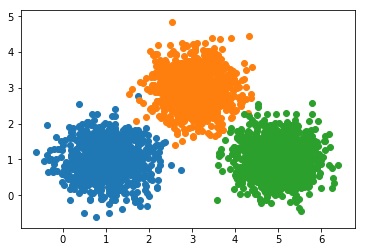

In [3]:

from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

score(X,labels)
plotClustering(X, labels)




<h3 id="Grupowanie-za-pomocą-KMeans">Grupowanie za pomocą KMeans<a class="anchor-link" href="#Grupowanie-za-pomocą-KMeans">¶</a></h3>


Silhouette Coefficient: 0.6746772944582773
Dunn Index: 1.1899834438965307
Davies Bouldin Index: 0.4466881074619427


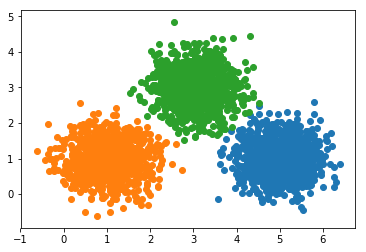

In [4]:

k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)


score(X,k_means.labels_)
plotClustering(X, k_means.labels_)



Silhouette Coefficient: 0.6746772944582773
Dunn Index: 1.1899834438965307
Davies Bouldin Index: 0.4466881074619427


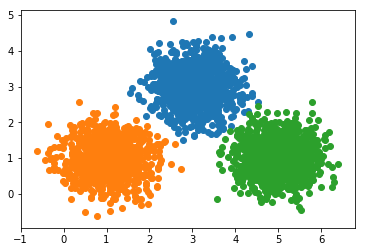

In [5]:
##
## n_init: Number of time the k-means algorithm will be run with different centroid seeds.
##         The final results will be the best output of n_init consecutive runs in terms of inertia.
##


k_means = KMeans(init='k-means++', n_clusters=3, n_init=1000)
k_means.fit(X)

score(X,k_means.labels_)
plotClustering(X, k_means.labels_)




<h3 id="Grupowanie-za-pomocą-MiniBatchKMeans">Grupowanie za pomocą MiniBatchKMeans<a class="anchor-link" href="#Grupowanie-za-pomocą-MiniBatchKMeans">¶</a></h3>


Silhouette Coefficient: 0.6746772944582773
Dunn Index: 1.1899834438965307
Davies Bouldin Index: 0.4466881074619427


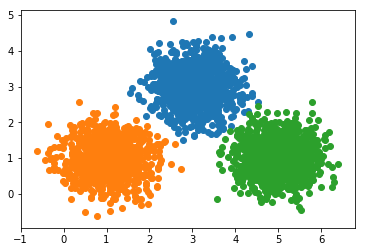

In [6]:
## Nic nie jest w treści o tym problemie


mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

score(X,k_means.labels_)
plotClustering(X, k_means.labels_)




<h3 id="Grupowanie-za-pomocą-Birch-bez-wtórnego-grupowania">Grupowanie za pomocą Birch bez wtórnego grupowania<a class="anchor-link" href="#Grupowanie-za-pomocą-Birch-bez-wtórnego-grupowania">¶</a></h3>


Silhouette Coefficient: 0.41501337241956054
Dunn Index: 0.6351154450242064
Davies Bouldin Index: 1.070911753804432


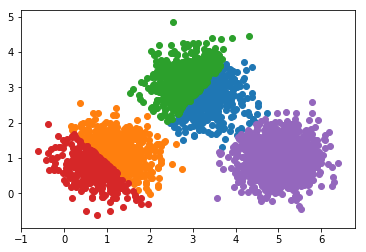

In [7]:

birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(X)


score(X,birch.labels_)
plotClustering(X, birch.labels_)



Silhouette Coefficient: 0.31356634683879336
Dunn Index: 0.658422643949118
Davies Bouldin Index: 0.8630988838978981


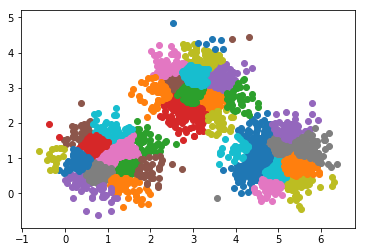

In [8]:
##  threshold
## The radius of the subcluster obtained by merging a new sample and
## the closest subcluster should be lesser than the threshold. 
## Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

##
## If the radius of the subcluster obtained by merging the new sample and 
## the nearest subcluster is greater than the square of the threshold and 
## if the number of subclusters is greater than the branching factor, 
## then a space is temporarily allocated to this new sample.
## The two farthest subclusters are taken and 
## the subclusters are divided into two groups on the basis of the distance between these subclusters.
#
#
birch = Birch(threshold=0.35, n_clusters=None)
birch.fit(X)

score(X,birch.labels_)
plotClustering(X, birch.labels_)




Silhouette Coefficient: 0.5262638215482028
Dunn Index: 0.9531394655326779
Davies Bouldin Index: 0.6972141311958642


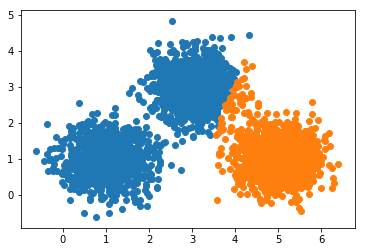

In [9]:
birch = Birch(threshold=2., n_clusters=None)
birch.fit(X)

score(X,birch.labels_)
plotClustering(X, birch.labels_)



<h3 id="Grupowanie-za-pomocą-Birch-z-wtórnym-grupowaniem">Grupowanie za pomocą Birch z wtórnym grupowaniem<a class="anchor-link" href="#Grupowanie-za-pomocą-Birch-z-wtórnym-grupowaniem">¶</a></h3>


Silhouette Coefficient: 0.6722502463777315
Dunn Index: 1.1892377911725864
Davies Bouldin Index: 0.45145285441872957


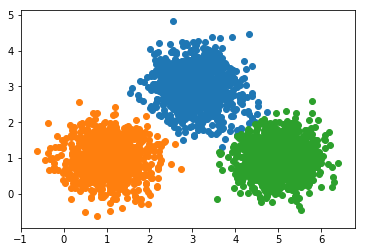

In [10]:

birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

score(X,birch.labels_)
plotClustering(X, birch.labels_)




<h3 id="Grupowanie-za-pomocą-DBScan">Grupowanie za pomocą DBScan<a class="anchor-link" href="#Grupowanie-za-pomocą-DBScan">¶</a></h3>


Silhouette Coefficient: 0.6041880789410246
Dunn Index: 0.6118495769898866
Davies Bouldin Index: 1.9145445815919102


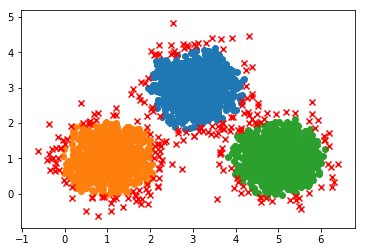

In [11]:

dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

score(X,dbscan.labels_)
plotClustering(X, dbscan.labels_)



Silhouette Coefficient: -0.5626124651187235
Dunn Index: 0.2799709600520752
Davies Bouldin Index: 2.045368260278466


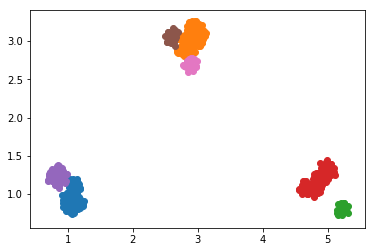

In [12]:
##
## eps 
## The maximum distance between two samples for them to be considered as in the same neighborhood.
##

dbscan = DBSCAN(eps=0.1, min_samples=25)
dbscan.fit(X)

score(X,dbscan.labels_)
plotClustering(X, dbscan.labels_, show_hidden=False)



Silhouette Coefficient: 0.4869100617309086
Dunn Index: 0.6284718221243746
Davies Bouldin Index: 2.6837850138417725


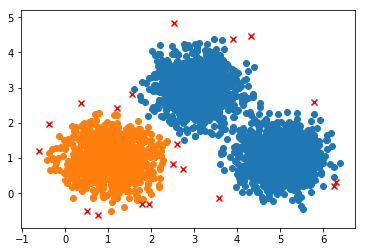

In [13]:
dbscan = DBSCAN(eps=0.4, min_samples=25)
dbscan.fit(X)

score(X,dbscan.labels_)
plotClustering(X, dbscan.labels_)

Silhouette Coefficient: 0.24868065151368784
Dunn Index: 0.3491900110219487
Davies Bouldin Index: 9.60343104110796


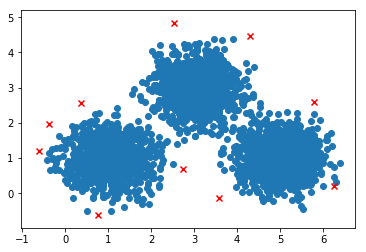

In [14]:
dbscan = DBSCAN(eps=0.45, min_samples=25)
dbscan.fit(X)

score(X,dbscan.labels_)
plotClustering(X, dbscan.labels_)


<h2 id="2.-Drugi-zestaw-danych">2. Drugi zestaw danych<a class="anchor-link" href="#2.-Drugi-zestaw-danych"></a></h2><p>Dane IRIS</p>


In [15]:

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data



In [16]:

def plot_iris(X, labels):
    
    fig, axis = plt.subplots(4,4, figsize=(20,20))
    
    score(X,labels)
    for dimX in range(4):
        for dimY in range(4):
           # print(X[:,[dimX,dimY]].shape)
            plotClustering(X[:,[dimX,dimY]],labels, axis=axis[dimX][dimY])
            
    
    
    plt.show()
    
    
    


Silhouette Coefficient: 0.5528190123564091
Dunn Index: 1.0402990802224186
Davies Bouldin Index: 0.6874359624451505


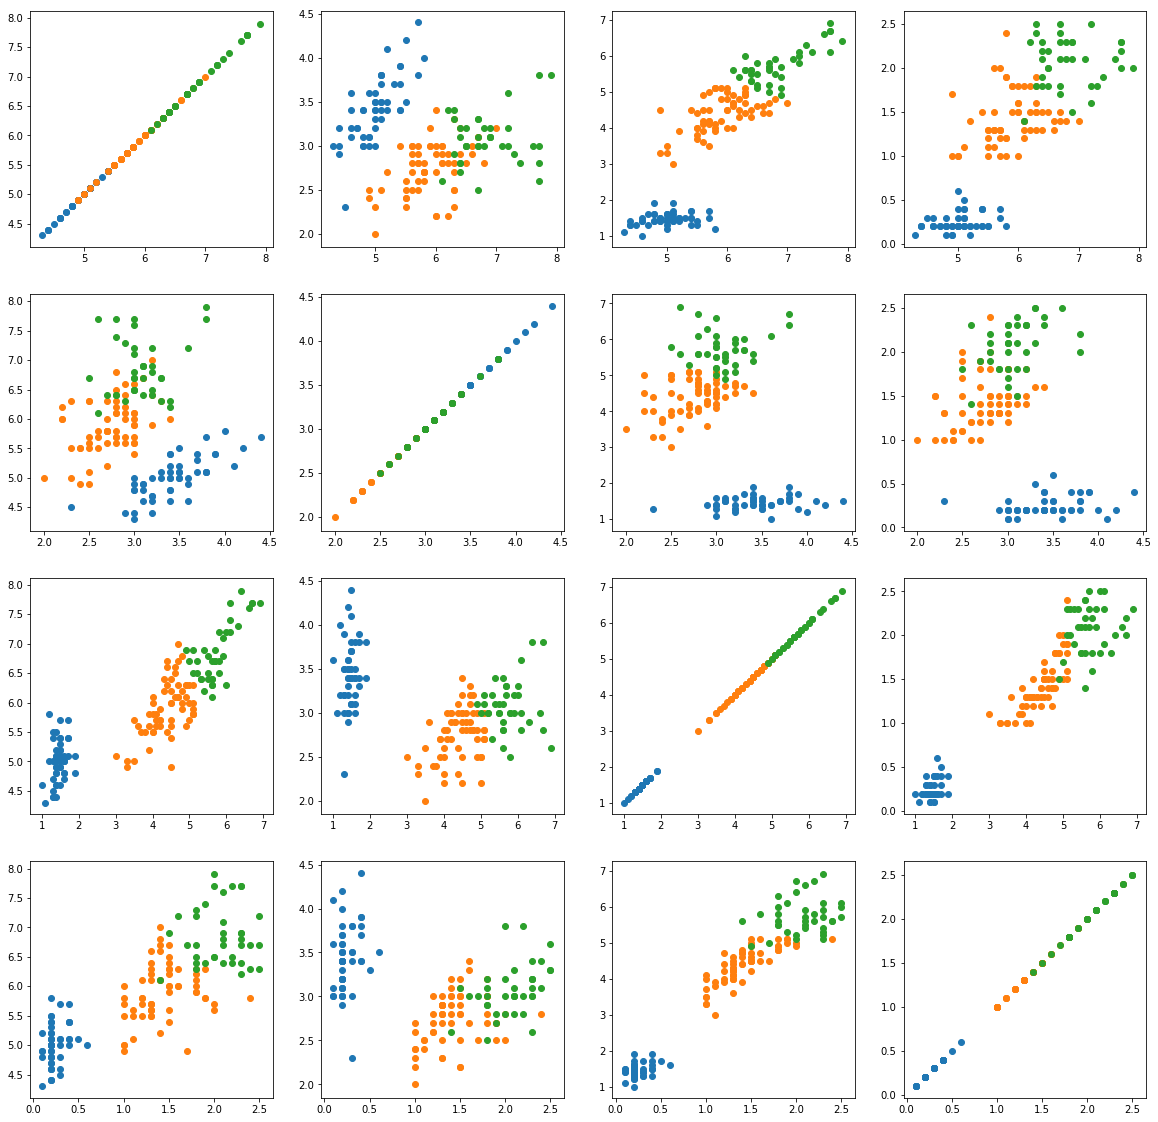

In [17]:

k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)


plot_iris(X[:], k_means.labels_)



Silhouette Coefficient: 0.5355022882455561
Dunn Index: 1.0064899287000135
Davies Bouldin Index: 0.677006134239387


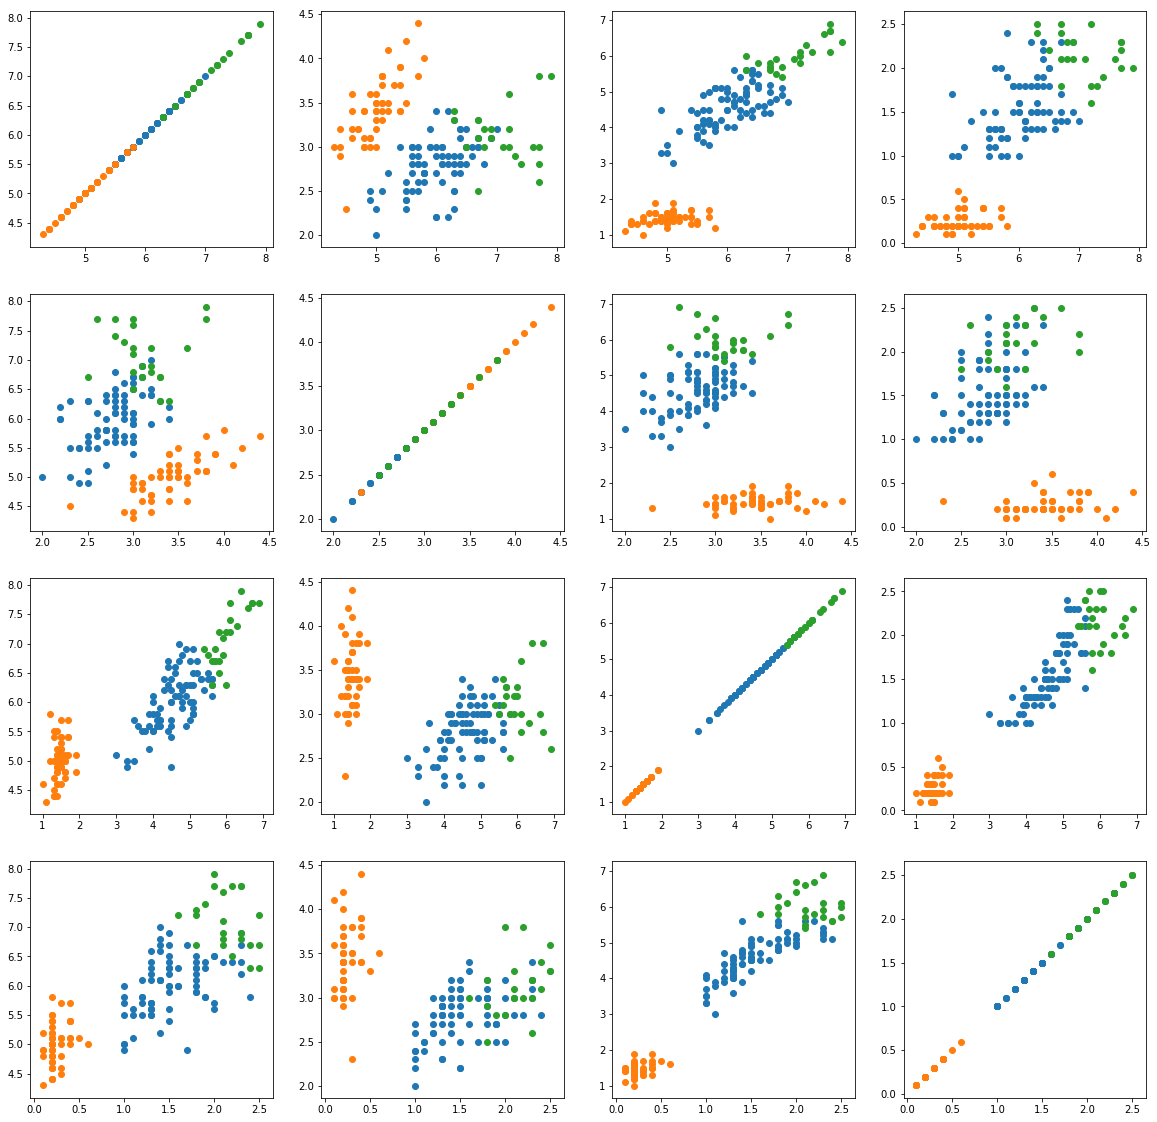

In [18]:

birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plot_iris(X[:], birch.labels_)


Silhouette Coefficient: 0.48603419703456835
Dunn Index: 0.24988666114591776
Davies Bouldin Index: 7.346707819107496


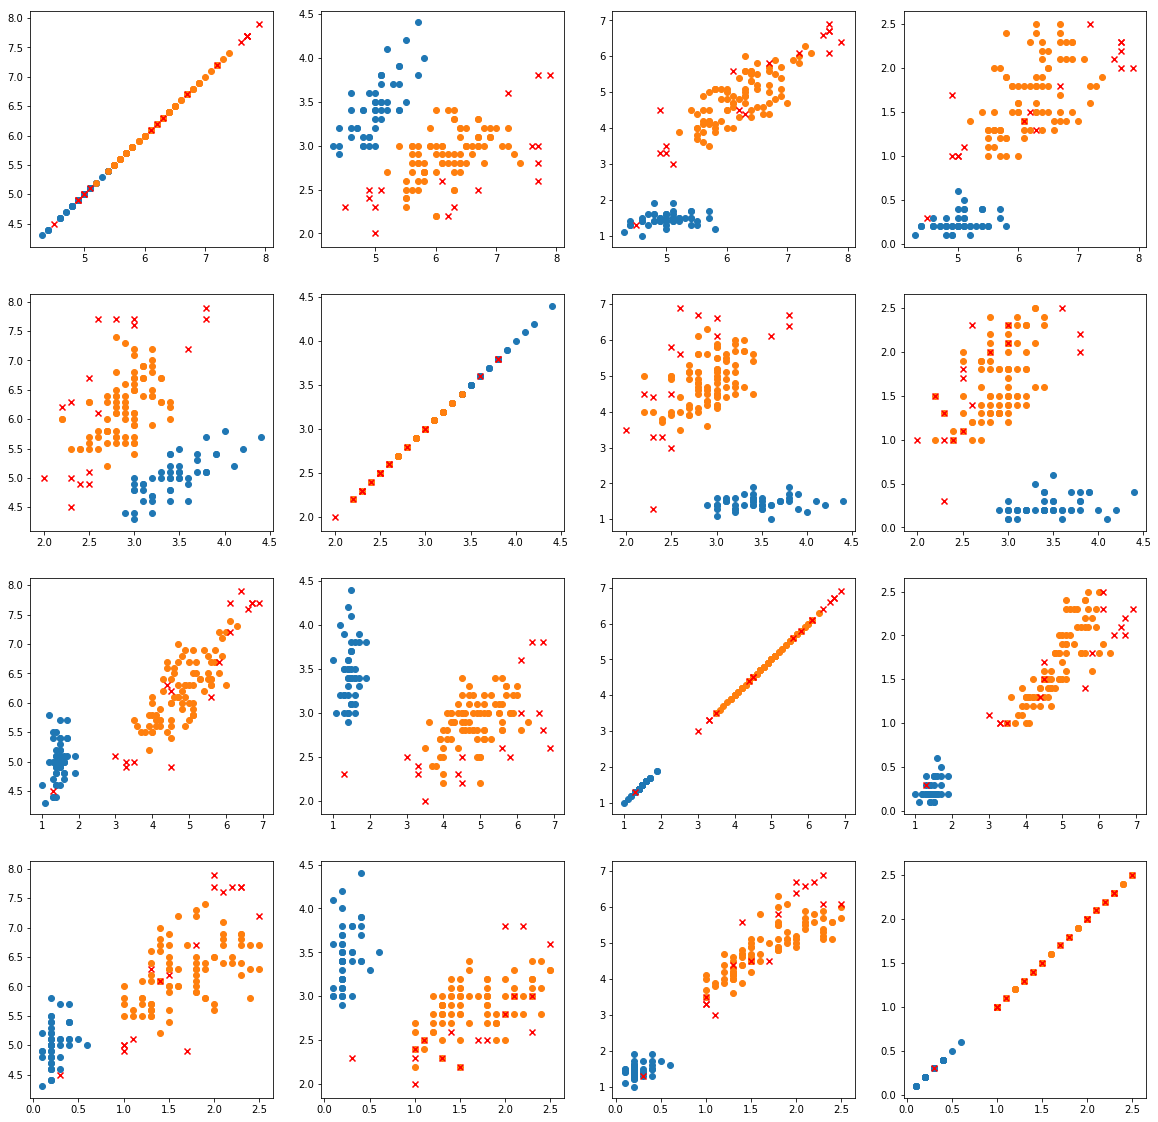

In [19]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plot_iris(X[:], dbscan.labels_)

